# Amazon Instant Video   



In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

data = pd.read_csv("../../data/amazon-instant-video/ratings_Amazon_Instant_Video.csv",
                   delimiter=",",
                   encoding="ISO-8859-1")
data.columns=["user","video","rating","r_id"]

data.head()

,user,video,rating,r_id
0,1,1,4,1215388800
1,2,1,4,1185840000
2,3,1,2,1281052800
3,4,1,5,1203897600
4,5,1,5,1205884800


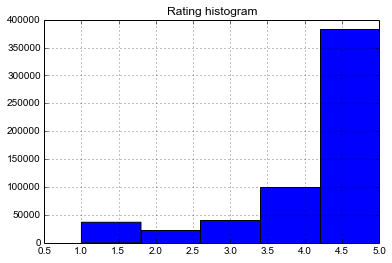

In [2]:
data["rating"].hist(bins=5).set_title("Rating histogram")

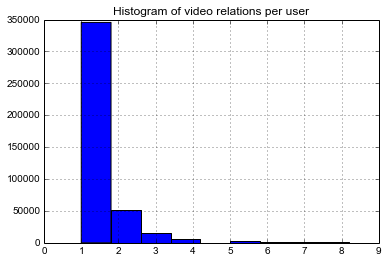

In [5]:
aux = data
aux["count"] = 1
videos_per_user = aux.groupby("user").sum()["count"]
plot = videos_per_user[videos_per_user<10].hist(bins=10)
plot.set_title("Histogram of video relations per user")

## Sparsity    


Given that we have very different datasets, like *Jester* and *Amazon Books*, it's interesting to compare sparsity between the user-item matrices. Since at most each user has an edge with each artist, the maximum possible amount of edges is $|E|_{max} = |\mathrm{Artists}| * |\mathrm{Users}|$. So we define sparsity:    

\begin{equation}
    \mathrm{Sparsity} = \frac{|E|}{|E|_{max}}
\end{equation}    

In [6]:
n_users = data["user"].unique().shape[0]
n_videos = data["video"].unique().shape[0]

sparsity = data.shape[0]/(n_users*n_videos)
print("Sparsity is %.8f"%sparsity)

Sparsity is 0.00005708
